# XIV.10.2
Решите численно уравнение переноса $y_t + y_x = 0$ с начальным условием $y(x,0) = \sin(4\pi x/L), 0 < x < L$ и периодическими гра-
ничными условиями.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import sin, pi

Входные данные (в соответствии с заданием)

In [2]:
L = 20
T = 18
h = 0.01
CFL_list = [0.6, 1, 1.01]
dt_out_results = 0.1

## а). Уголок
$\dfrac{y_i^{n+1} - y_i^n}{\tau} + \dfrac{y_i^{n} - y_{i-1}^n}{h} = 0$\
$y_i^{n+1} = y_i^n - \sigma (y_i^n - y_{i-1}^n); \; \sigma = \tau/h$

In [7]:
# Начальное условие
def y_0(x):
    return sin(4 * pi * x / L)

# Число Куранта, временной шаг
CFL = CFL_list[2]
tau = CFL * h

# сетка
grid = np.arange(0, L + h, h)
NX = len(grid)

# текущий и предыдущий временной слой
y_current = [y_0(x) for x in grid]
y_previous = []

# вывод значений
y_output = []
y_output.append([i for i in y_current])
t_output = [0]
time_next_output = dt_out_results

t = tau
while t <= T:
    # сохранение слоя для вывода
    if t >= time_next_output:
        y_output.append([i for i in y_current])
        t_output.append(t)
        time_next_output += dt_out_results
    # расчет следующего временного слоя
    y_previous = [i for i in y_current]
    for i in range(1, NX, 1):
        y_current[i] = y_previous[i] - CFL * (y_previous[i] - y_previous[i - 1])
    y_current[0] = y_current[-1]
    t += tau

# сохранение последнего слоя
# y_output.append([i for i in y_current])
# t_output.append(t - tau)


In [4]:
tau

0.006

In [ ]:
for i in range(len(y_output)):
    plt.plot(grid, y_output[i], label=f"t = {t_output[i]:.2f}")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"CFL = {CFL}")
# plt.savefig(f"XIV.10.2 - a - CFL = {CFL}.png")

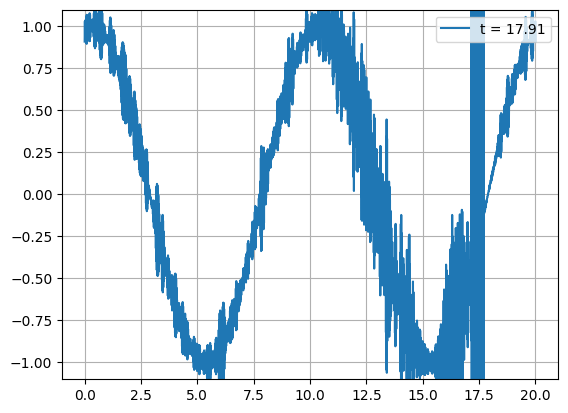

In [8]:
fig, ax = plt.subplots()

line, = ax.plot(grid, y_output[0])
line.set_label(f"t = {t_output[0]:.2f}")
ax.legend(loc="upper right")
ax.grid()

def animate(i):
    line.set_ydata(y_output[i])  # update the data.
    line.set_label(f"t = {t_output[i]:.2f}")
    ax.legend(loc="upper right")
    return line,


ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=len(y_output))

writer = animation.FFMpegWriter(
    fps=50, metadata=dict(artist='Me'), bitrate=1800)
ani.save(f"XIV.10.2 - a - CFL = {CFL}.mp4", writer=writer)

# visualization
# from IPython.display import HTML
# HTML(ani.to_jshtml())

## б). схема Лакса-Вендроффа
$\dfrac{y_i^{n+1} - y_i^n}{\tau} + a \dfrac{y_{i+1}^{n} - y_{i-1}^n}{2h} - \dfrac{a^2 \tau}{2} \dfrac{y_{i+1}^{n} - 2 y_i^n + y_{i-1}^n}{h^2} = 0$ \
В нашем случае $a = 1$, поэтому формула для вычисления $y_i^{n+1}$ принимает вид ($\sigma = \tau/h$): \
$y_i^{n+1} = y_i^n - \sigma \dfrac{y_{i+1}^{n} - y_{i-1}^n}{2} + \dfrac{\sigma^2}{2} (y_{i+1}^{n} - 2 y_i^n + y_{i-1}^n) = 0$\
Учет граничных условий происходит согласно описанию в задавальнике

In [14]:
# Начальное условие
def y_0(x):
    return sin(4 * pi * x / L)

# Число Куранта, временной шаг
CFL = CFL_list[2]
tau = CFL * h

# сетка
grid = np.arange(0, L + h, h)
NX = len(grid)

# текущий и предыдущий временной слой
y_current = [y_0(x) for x in grid]
y_previous = []

# вывод значений
y_output = []
y_output.append([i for i in y_current])
t_output = [0]
time_next_output = dt_out_results

t = tau
while t <= T:
    # сохранение слоя для вывода
    if t >= time_next_output:
        y_output.append([i for i in y_current])
        t_output.append(t)
        time_next_output += dt_out_results
    # расчет следующего временного слоя
    y_previous = [i for i in y_current]
    for i in range(1, NX - 1, 1):
        y_current[i] = y_previous[i] - CFL * (y_previous[i + 1] - y_previous[i - 1]) / 2 + CFL ** 2 / 2 * (y_previous[i + 1] - 2 * y_previous[i] + y_previous[i - 1])
    # граничные условия
    i = 0
    y_current[0] = y_previous[i] - CFL * (y_previous[i + 1] - y_previous[i - 1]) / 2 + CFL ** 2 / 2 * (y_previous[i + 1] - 2 * y_previous[i] + y_previous[i - 1])
    i = -1
    y_current[-1] = y_previous[i] - CFL * (y_previous[i + 1] - y_previous[i - 1]) / 2 + CFL ** 2 / 2 * (y_previous[i + 1] - 2 * y_previous[i] + y_previous[i - 1])
    
    t += tau

# сохранение последнего слоя
y_output.append([i for i in y_current])
t_output.append(t - tau)


In [ ]:
for i in range(len(y_output)):
    plt.plot(grid, y_output[i], label=f"t = {t_output[i]:.2f}")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"CFL = {CFL}")
plt.savefig(f"XIV.10.2 - b - CFL = {CFL}.png")

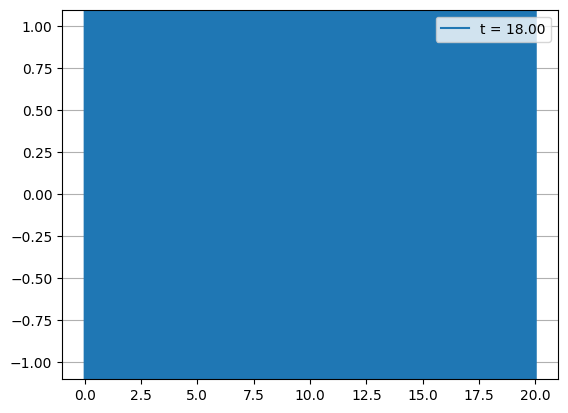

In [15]:
fig, ax = plt.subplots()

line, = ax.plot(grid, y_output[0])
line.set_label(f"t = {t_output[0]:.2f}")
ax.legend(loc="upper right")
ax.grid()

def animate(i):
    line.set_ydata(y_output[i])  # update the data.
    line.set_label(f"t = {t_output[i]:.2f}")
    ax.legend(loc="upper right")
    return line,


ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=len(y_output))

writer = animation.FFMpegWriter(
    fps=50, metadata=dict(artist='Me'), bitrate=1800)
ani.save(f"XIV.10.2 - b - CFL = {CFL}.mp4", writer=writer)

# visualization
# from IPython.display import HTML
# HTML(ani.to_jshtml())